In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon
from pathlib import Path

In [2]:
datapath = Path('../data/')

## TEST YOUR SKILLS #0
- make a new geodataframe of the parks
- add a columns with centroids for each park
- plot an interactive window with the park centroids and the neighborhoods
- hints: 
    - remember the shapely methods are available for each geometry object (e.g. `centroid()`) 
    - you can loop over the column in a couple different ways
    - you can define which columns contains the geometry of a geodataframe
    - you will likely have to define the CRS

In [3]:
parks = gp.read_file(datapath / 'Madison_parks.geojson')
hoods = gp.read_file(datapath / 'Neighborhood_Associations.geojson')

In [4]:
# loopy solution
parks_cent = parks.copy()
centroids = []
for i in parks_cent.geometry.values:
    centroids.append(i.centroid)
parks_cent['centroid'] = centroids

/Users/mnfienen/miniconda3/envs/pyclass/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [5]:
# do it all at once with a list comprehension
parks_cent['centroid'] = [i.centroid for i in parks_cent.geometry]

/Users/mnfienen/miniconda3/envs/pyclass/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [6]:
# set the geometry and CRS
parks_cent.set_geometry('centroid', inplace=True)
parks_cent.set_crs(parks.crs, inplace=True);

In [7]:
m_hoods = hoods.explore()
parks_cent.explore(m=m_hoods)

# TEST YOUR SKILLS #1
Using the `bounds` geodataframe you just made, write a function to visualize predicate behaviors.
- your function should accept a left geodataframe, a right geodataframe, and a string for the predicate
- your function should plot:
    - the left geodataframe in (default) blue
    - the result of the spatial join operation in another color
    - the right geodataframe in another color with outline only
- then you should set the title of the plot to the string predicate value used
- the geodataframes to test with are `isthmus_parks` and `bounds`
- your function should `return` the joined geodataframe

- a couple hints:
    - in the `plot` method are a couple args called `facecolor` and `edgecolor` that will help plot the rectangle
    - there are other predicates to try out 

- _advanced options_: if that was easy, you can try a couple other things like:
    - explore joins with points and lines in addition to just polygons
    - change around the `bounds` polygon dimensions 
    - use `explore()` to make an interactive map

### first have to bring over some things from the main lesson

In [8]:
parks.to_crs(3071, inplace=True)
hoods.to_crs(parks.crs, inplace=True)
isthmus = hoods.loc[hoods['NEIGHB_NAME'].str.contains('Marquette') | 
                   hoods['NEIGHB_NAME'].str.contains('Tenney')]
from shapely.geometry import box
bbox = box(570600, 290000, 573100, 291700)
bounds = gp.GeoDataFrame(geometry=[bbox],crs=parks.crs)
isthmus_parks = gp.sjoin(left_df=parks, right_df=isthmus)
isthmus_parks.drop(columns=[ 'index_right','OBJECTID_right', 'NA_ID', 'STATUS', 'CLASSIFICA', 'Web',
       'ShapeSTArea', 'ShapeSTLength'], inplace=True)

In [9]:
def show_predicate(ldf,rdf,predicate):
    sj = gp.sjoin(ldf, rdf, predicate=predicate)
    ax = ldf.plot()
    sj.plot(ax=ax, color='black')
    rdf.plot(facecolor='none', edgecolor='orange', ax=ax)
    ax.set_title(predicate)
    return sj

,OBJECTID_left,Park_ID,Type,Acreage,Park_Name,ShortName,Subtype,SHAPESTArea,SHAPESTLength,geometry,NEIGHB_NAME,index_right
6,6422,1360,NEIGHBORHOOD,6.08,Yahara Place Park,Yahara Place,None,264814.254303,4619.706039,"POLYGON ((572969.327 290871.975, 572979.154 29...",Marquette Neighborhood Association,0
12,6428,3540,TRAFFICWAY,0.10,Few Street (South) Street End,Few St,None,4522.502594,270.158029,"POLYGON ((572000.229 289978.256, 572017.381 28...",Marquette Neighborhood Association,0
19,6435,3480,TRAFFICWAY,0.12,Baldwin Street End,Baldwin St,None,5319.010742,294.682954,"POLYGON ((572164.248 290098.321, 572179.960 29...",Marquette Neighborhood Association,0
49,6465,1240,MINI,0.66,Morrison Park,Morrison,None,28667.633148,680.142299,"POLYGON ((572460.118 290317.086, 572465.604 29...",Marquette Neighborhood Association,0
56,6472,1100,OPEN SPACE,7.66,Yahara River Parkway,Yahara River,None,333593.558197,13219.124814,"MULTIPOLYGON (((572463.071 290603.880, 572425....",Marquette Neighborhood Association,0


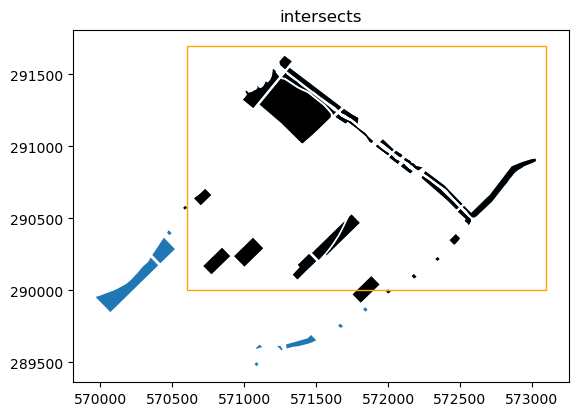

In [10]:
sj = show_predicate(isthmus_parks, bounds, 'intersects')
sj.head()

/Users/mnfienen/miniconda3/envs/pyclass/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


,geometry,index_right,OBJECTID_left,Park_ID,Type,Acreage,Park_Name,ShortName,Subtype,SHAPESTArea,SHAPESTLength,NEIGHB_NAME


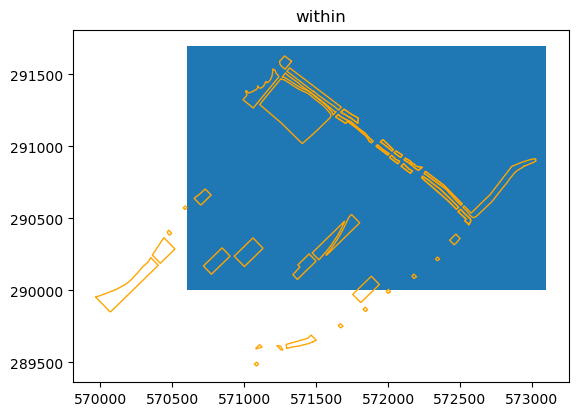

In [11]:
sj = show_predicate(bounds, isthmus_parks, 'within')
sj.head()